<h2>Exploratory Data Analysis</h2>

<p>
    <b>Bank Personal Loan Modelling</b>
<br>
Bank_Personal_Loan_Modelling.csv retrieved from https://www.kaggle.com/datasets/ngnnguynthkim/bank-personal-loan-modellingcsv
There have been a few cells / values that have been altered for this EDA run through, compared to the csv that can be downloaded. 
</p>

<b>Attribute Information:</b><br>
ID: Customer ID<br>
Age: Customer's age in completed years<br>
Experience: #years of professional experience<br>
Income: Annual income of the customer<br>
ZIP Code: Home Address ZIP code.<br>
Family: Family size of the customer<br>
CCAvg: Avg. spending on credit cards per month<br>
Education: Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional<br>
Mortgage: Value of house mortgage if any.<br>
Personal Loan: Did this customer accept the personal loan offered in the last campaign?<br>
Securities Account: Does the customer have a securities account with the bank?<br>
CD Account: Does the customer have a certificate of deposit (CD) account with the bank?<br>
Online: Does the customer use internet banking facilities?<br>
Credit card: Does the customer use a credit card issued by the bank?<br>

In [171]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
import warnings
#with warnings.catch_warnings():
#    warnings.simplefilter('ignore')
warnings.simplefilter('always', category=UserWarning)

In [173]:
# Import csv data
loan_data = pd.read_csv('Bank_Personal_Loan_Modelling_Mod.csv')
loan_data.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1.0,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1.0,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1.0,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2.0,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2.0,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2.0,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2.0,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3.0,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2.0,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3.0,0,1,0,0,0,0


In [174]:
# Loan Data Info
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           4999 non-null   float64
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 547.0 KB


<h3>Shape of Data</h3>

In [175]:
# Loan Data Shape
loan_data.shape

(5000, 14)

<h3>Descirption of Data</h3>

In [176]:
# Loan Data Describe
loan_data.describe(include = 'all').transpose()
#loan_data.describe(include = 'all')

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.356400,11.558032,23.0,35.00,45.0,55.00,151.0
Experience,5000.0,20.098400,11.467197,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,2113.520800,144231.253437,8.0,39.00,64.0,98.00,10198763.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.395600,1.149332,-2.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,4999.0,1.880976,0.839951,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,2251.623400,155217.983172,0.0,0.00,0.0,101.00,10975623.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [177]:
#Analysis: 
#I am seeing that we should not have any negative numbers for experience.
#I am also seeing that there is a wide range of income with it skewed heavily, due to the 75% being 98k while max is 10198763
#I am also seeing that that there is a high amount >= 50% that have no mortgage
#I am seeing that the mortgage is skewed heavily, due to the 75% being 101 and the max being 10975623
#I am seeing that we have a data issue with age as it is skewed with 75% being 55 and max being 151
#Experience doesn't seem skewed due to 25%-10, 50%-20, 75%-30 and max being 43. Have to address the negative number though
#Initial view of family seems very slightly skewed with min-1, 25%-1, 50%-2, 75%-3 and max-4

<h3>Check Data for Null Values</h3>

In [178]:
#Check for is null
loan_data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             1
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

<h3>Check for Unique Values</h3>

In [179]:
#Query for the unique values in each of the columns. 
loan_data.nunique()

#Analysis: it appears that there is an assortment of ages, experience, income, zip codes, credit card averages and mortgages.

ID                    5000
Age                     46
Experience              47
Income                 163
ZIP Code               467
Family                   5
CCAvg                  108
Education                3
Mortgage               348
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

<h3>Address Experience Negative Values</h3>

In [180]:
#Check for values in experience that are negative due to the describe pulling up a -3 
negative_values_count = loan_data[loan_data['Experience'] < 0]['Experience'].count()
display(negative_values_count)


52

In [181]:
#List of the entries that are affected by the negative values
negative_values = loan_data[loan_data['Experience'] < 0]
display(negative_values)

#Analysis: All the negative values are -1,-2 or -3 so I am not expective an issue with 52 out of 5000 records.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3.0,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2.0,0,0,0,0,0,0
315,316,24,-2,51,90630,3,0.30,3.0,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3.0,89,0,0,0,1,0
524,525,24,-1,75,93014,4,0.20,1.0,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2.0,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3.0,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3.0,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2.0,0,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1.0,0,0,1,0,0,1


In [182]:
#Replace the negative values in the dataset. Could look at converting negative numbers to positive numbers if they were in the 
#same range. It appears that the negative numbers are -1,-2,-3 and the mean in the dataset is a little over 20 but they are
#in the range. Evaluation of the income of most of these entries seems to be on the lower end also. 
#It appears that replacing the negative numbers with the positive absolute value might be the best option at this time 
#to preserve the best possible dataset.

#This code will take the above lines that have neg values and replace those values with the absolute value for that column
#loan_data.loc[loan_data['Experience'] < 0, 'Experience'] = loan_data['Experience'].abs()

loan_data.loc[loan_data['Experience'] < 0, 'Experience'] = loan_data['Experience'].mean()

In [183]:
#I want to verify the results of the code above to confirm that the neg values are taken care of with expected results
pd.set_option('display.max_rows',loan_data.shape[0]+1)
loan_data.head(250)

#Analysis: lines 89 and 226 are both changed so one would assume that the other lines were successful in the same process.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0000,49,91107,4,1.60,1.0,0,0,1,0,0,0
1,2,45,19.0000,34,90089,3,1.50,1.0,0,0,1,0,0,0
2,3,39,15.0000,11,94720,1,1.00,1.0,0,0,0,0,0,0
3,4,35,9.0000,100,94112,1,2.70,2.0,0,0,0,0,0,0
4,5,35,8.0000,45,91330,4,1.00,2.0,0,0,0,0,0,1
5,6,37,13.0000,29,92121,4,0.40,2.0,155,0,0,0,1,0
6,7,53,27.0000,72,91711,2,1.50,2.0,0,0,0,0,1,0
7,8,50,24.0000,22,93943,1,0.30,3.0,0,0,0,0,0,1
8,9,35,10.0000,81,90089,3,0.60,2.0,104,0,0,0,1,0
9,10,34,9.0000,180,93023,1,8.90,3.0,0,1,0,0,0,0


<h3>Mortgage</h3> 

In [184]:
#Find the number of people with zero mortgage
np.sum(loan_data['Mortgage'] == 0)

#Analysis: The initial inspection of the data with the describe was correct. Over half of the dataset has no mortgage
# 5000 data set and 3462 with no mortgage

3461

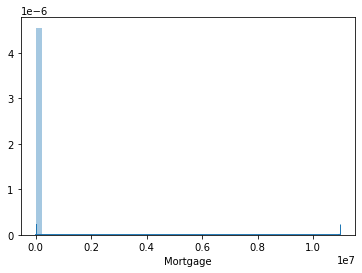

In [185]:
#use this to get a high level view of the mortgage values
sns.distplot(loan_data['Mortgage'],kde=True, rug=True);

In [186]:
#Want to look at highest mortgage values in df to see how skewed data is
loan_data.sort_values(by=['Mortgage']).tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3515,3516,50,26.0,148,94143,2,0.4,1.0,508,0,0,0,0,0
4240,4241,39,14.0,161,95064,1,4.1,1.0,509,0,1,0,0,0
2956,2957,62,38.0,195,91125,4,5.2,3.0,522,1,0,1,1,1
952,953,44,20.0,180,93943,2,7.6,1.0,524,0,0,0,0,1
2041,2042,45,20.0,180,95403,3,8.5,2.0,535,1,0,0,0,0
4859,4860,34,8.0,165,91107,1,7.0,3.0,541,1,0,0,0,0
473,474,64,39.0,182,93955,1,1.2,2.0,547,1,0,0,1,0
4672,4673,52,26.0,180,95831,1,1.7,1.0,550,0,0,0,1,0
3608,3609,59,35.0,202,94025,1,4.7,1.0,553,0,0,0,0,0
2841,2842,37,11.0,190,94305,4,7.3,2.0,565,1,0,1,1,0


In [187]:
#i want to drop row 111 as it has skewed mortgage data
loan_data = loan_data.drop(index=111)
loan_data.sort_values(by=['Mortgage']).tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2394,2395,42,18.0,145,94065,2,8.0,1.0,505,0,0,0,0,0
3515,3516,50,26.0,148,94143,2,0.4,1.0,508,0,0,0,0,0
4240,4241,39,14.0,161,95064,1,4.1,1.0,509,0,1,0,0,0
2956,2957,62,38.0,195,91125,4,5.2,3.0,522,1,0,1,1,1
952,953,44,20.0,180,93943,2,7.6,1.0,524,0,0,0,0,1
2041,2042,45,20.0,180,95403,3,8.5,2.0,535,1,0,0,0,0
4859,4860,34,8.0,165,91107,1,7.0,3.0,541,1,0,0,0,0
473,474,64,39.0,182,93955,1,1.2,2.0,547,1,0,0,1,0
4672,4673,52,26.0,180,95831,1,1.7,1.0,550,0,0,0,1,0
3608,3609,59,35.0,202,94025,1,4.7,1.0,553,0,0,0,0,0


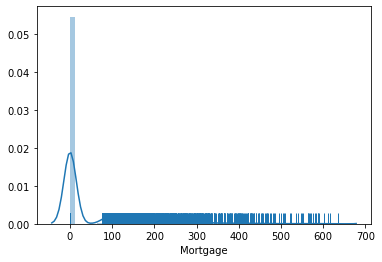

In [188]:
#use this to get a high level view of the mortgage values
sns.distplot(loan_data['Mortgage'],kde=True, rug=True);

<h3>Credit Card Average</h3>

In [189]:
#Find the number of people with zero credit card spending per month
np.sum(loan_data['CCAvg'] == 0)

#Analysis: There is a pretty low credit card average per month with only 106 out of 5000 at 0. I would 
#expect this number to be higher in todays society with everything going to other forms of payment
#besides cash.

106

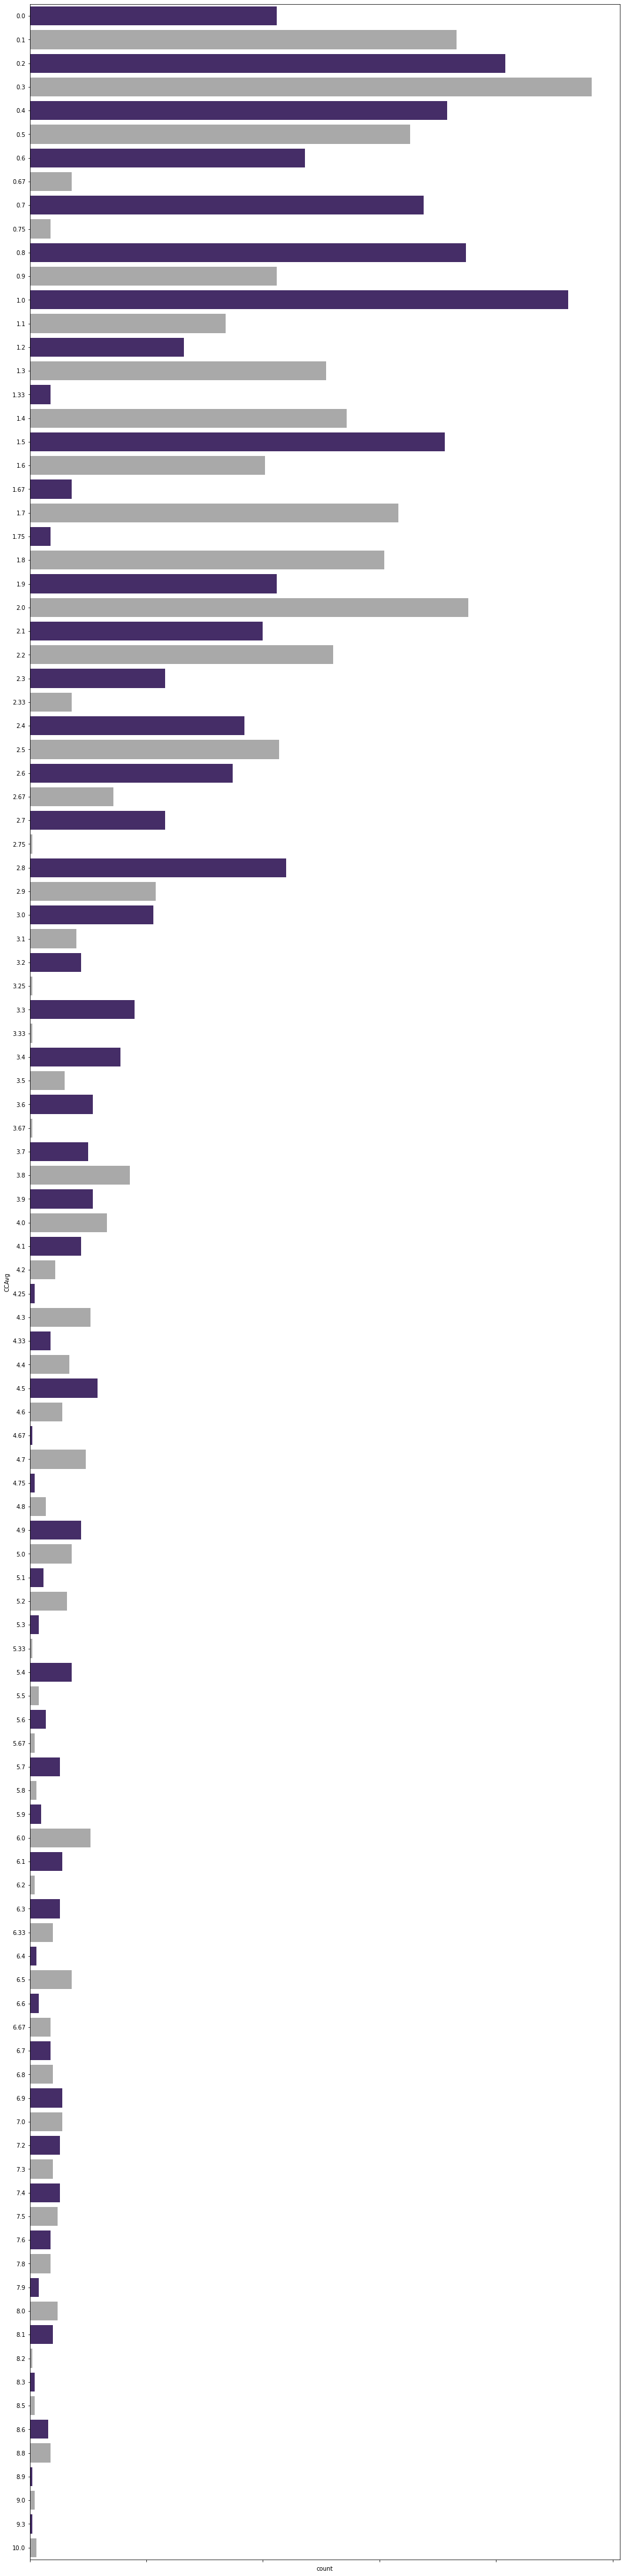

In [190]:
#Univariate plot to look at the credit card average
plt.figure(figsize=(18,80));
chart = sns.countplot(y="CCAvg",data=loan_data, palette=['#432371',"#A9A9A9"]);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


#sns.distplot(loan_data['CCAvg'], kde=True, rug=True);
#analysis - it looks like most sample data credit card avg falls within the 0k-3k but highly skewed.

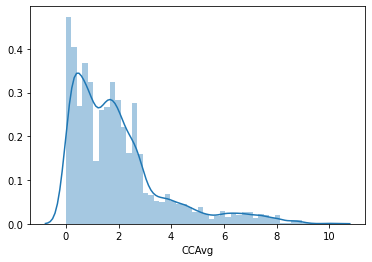

In [191]:
#use this to get a high level view of the data line as compared to the count plot above.
sns.distplot(loan_data['CCAvg'], kde=True, rug=False);

<h3>Education</h3>

In [192]:
#Find the value counts of all the categorical columns

#Change the education column to reflect the category based on the int value
loan_data['Education'] = loan_data['Education'].replace({1:'undergrad',2:'graduate',3:'advanced/professional'})
#verify a sample of the results after replacement
loan_data.head(100)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1.0000,49,91107,4,1.6,undergrad,0,0,1,0,0,0
1,2,45,19.0000,34,90089,3,1.5,undergrad,0,0,1,0,0,0
2,3,39,15.0000,11,94720,1,1.0,undergrad,0,0,0,0,0,0
3,4,35,9.0000,100,94112,1,2.7,graduate,0,0,0,0,0,0
4,5,35,8.0000,45,91330,4,1.0,graduate,0,0,0,0,0,1
5,6,37,13.0000,29,92121,4,0.4,graduate,155,0,0,0,1,0
6,7,53,27.0000,72,91711,2,1.5,graduate,0,0,0,0,1,0
7,8,50,24.0000,22,93943,1,0.3,advanced/professional,0,0,0,0,0,1
8,9,35,10.0000,81,90089,3,0.6,graduate,104,0,0,0,1,0
9,10,34,9.0000,180,93023,1,8.9,advanced/professional,0,1,0,0,0,0


In [193]:
#Find the row that has the null (NaN) value
loan_data[loan_data['Education'].isna()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
13,14,59,32.0,40,94920,4,2.5,NaN,0,0,0,0,1,0


In [194]:
#i want to drop row 13 as it has no education data and verify that row was dropped
loan_data = loan_data.drop(index=13)
loan_data[loan_data['Education'].isna()]

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [195]:
#Find the counts of each of the education levels
undergrad_count = np.sum(loan_data['Education'] == 'undergrad')
graduate_count = np.sum(loan_data['Education'] == 'graduate')
advanced_count = np.sum(loan_data['Education'] == 'advanced/professional')

def sum_variables(x,y,z):
    sum = x+y+z
    return sum

print('Total with undergrad education: ', undergrad_count)
print('Total with graduate education: ', graduate_count)
print('Total with advanced / professional education: ', advanced_count)

#Verify that the total count is correct after replacement - validation
print('Total of all results: ', sum_variables(undergrad_count,graduate_count,advanced_count) )

Total with undergrad education:  2096
Total with graduate education:  1401
Total with advanced / professional education:  1501
Total of all results:  4998


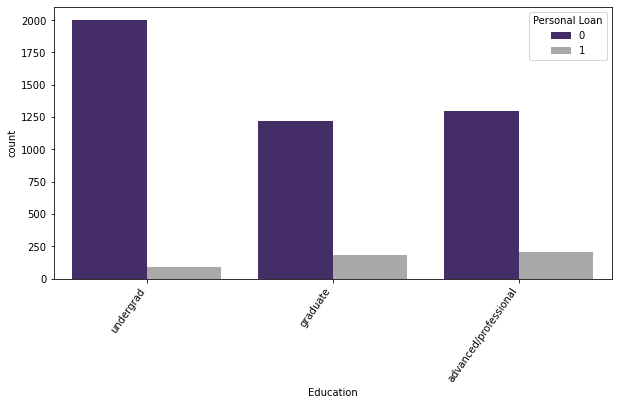

In [196]:
#Education Data
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['Education'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

#analysis: Results vary between the three different categories but not highly skewed

<h3>Age</h3>

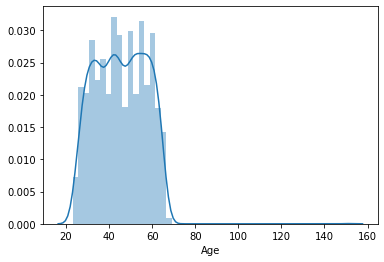

In [198]:
#use this to get a high level view of age
sns.distplot(loan_data['Age'], kde=True, rug=False);

In [199]:
#Want to look at highest age values in df to see how skewed data is
loan_data.sort_values(by=['Age']).tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4474,4475,66,41.0,73,95817,3,2.40,undergrad,0,0,0,0,0,0
668,669,66,41.0,18,94010,3,0.50,undergrad,0,0,0,0,0,0
4290,4291,66,42.0,95,94596,2,0.00,advanced/professional,0,0,0,0,1,0
255,256,66,40.0,42,92103,2,0.70,advanced/professional,138,0,0,0,0,1
908,909,66,36.0,55,93023,4,1.67,advanced/professional,0,0,0,0,0,1
2506,2507,66,42.0,39,94590,1,1.90,graduate,0,0,0,0,1,1
1609,1610,66,41.0,105,93023,1,0.80,advanced/professional,0,0,1,1,1,1
2300,2301,66,41.0,70,93711,3,2.20,undergrad,0,0,0,0,0,0
465,466,66,42.0,35,94305,1,1.90,graduate,172,0,0,0,1,0
2661,2662,66,41.0,145,90009,1,2.50,undergrad,0,0,0,0,1,0


In [200]:
#i want to drop row 449 as it has skewed age
loan_data = loan_data.drop(index=449)
loan_data.sort_values(by=['Age']).tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
255,256,66,40.0,42,92103,2,0.70,advanced/professional,138,0,0,0,0,1
4395,4396,66,41.0,25,94720,4,0.60,graduate,0,0,0,0,1,1
668,669,66,41.0,18,94010,3,0.50,undergrad,0,0,0,0,0,0
2506,2507,66,42.0,39,94590,1,1.90,graduate,0,0,0,0,1,1
3778,3779,66,41.0,14,95814,4,0.60,graduate,0,0,0,0,0,0
4616,4617,66,41.0,114,92521,1,0.80,advanced/professional,0,0,0,0,1,1
4290,4291,66,42.0,95,94596,2,0.00,advanced/professional,0,0,0,0,1,0
257,258,66,41.0,18,92691,3,0.50,undergrad,0,0,0,0,0,1
2958,2959,66,41.0,65,92612,3,2.40,undergrad,0,0,0,0,0,0
99,100,66,41.0,15,91711,3,0.10,advanced/professional,0,0,0,0,1,0


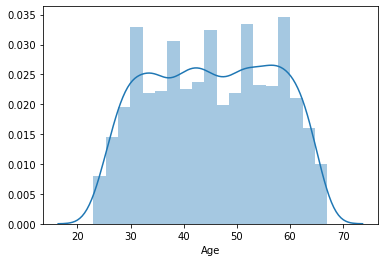

In [201]:
#use this to get a high level view of the data line
sns.distplot(loan_data['Age'], kde=True, rug=False);

<h3>Experience</h3>

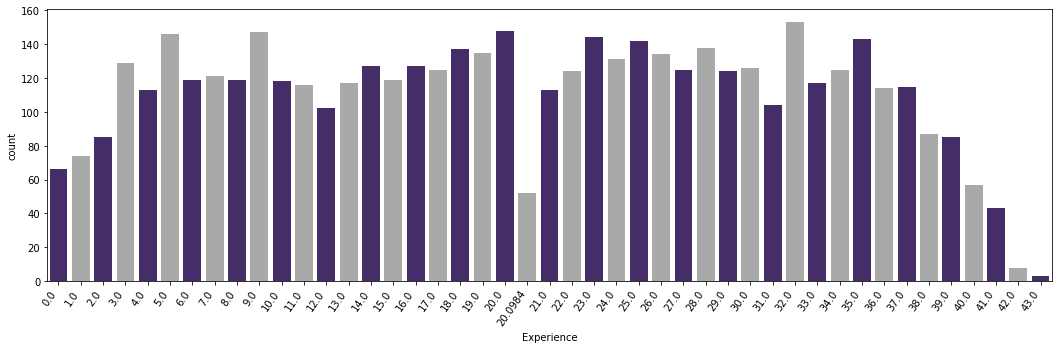

In [202]:
#Univariate plot to look at the experience
plt.figure(figsize=(18,5));
chart = sns.countplot(loan_data['Experience'], palette=['#432371',"#A9A9A9"]);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

#analysis - the experience of the sample data is pretty steady from 0 years to 38 years and then tappers off

<h3>Income</h3>

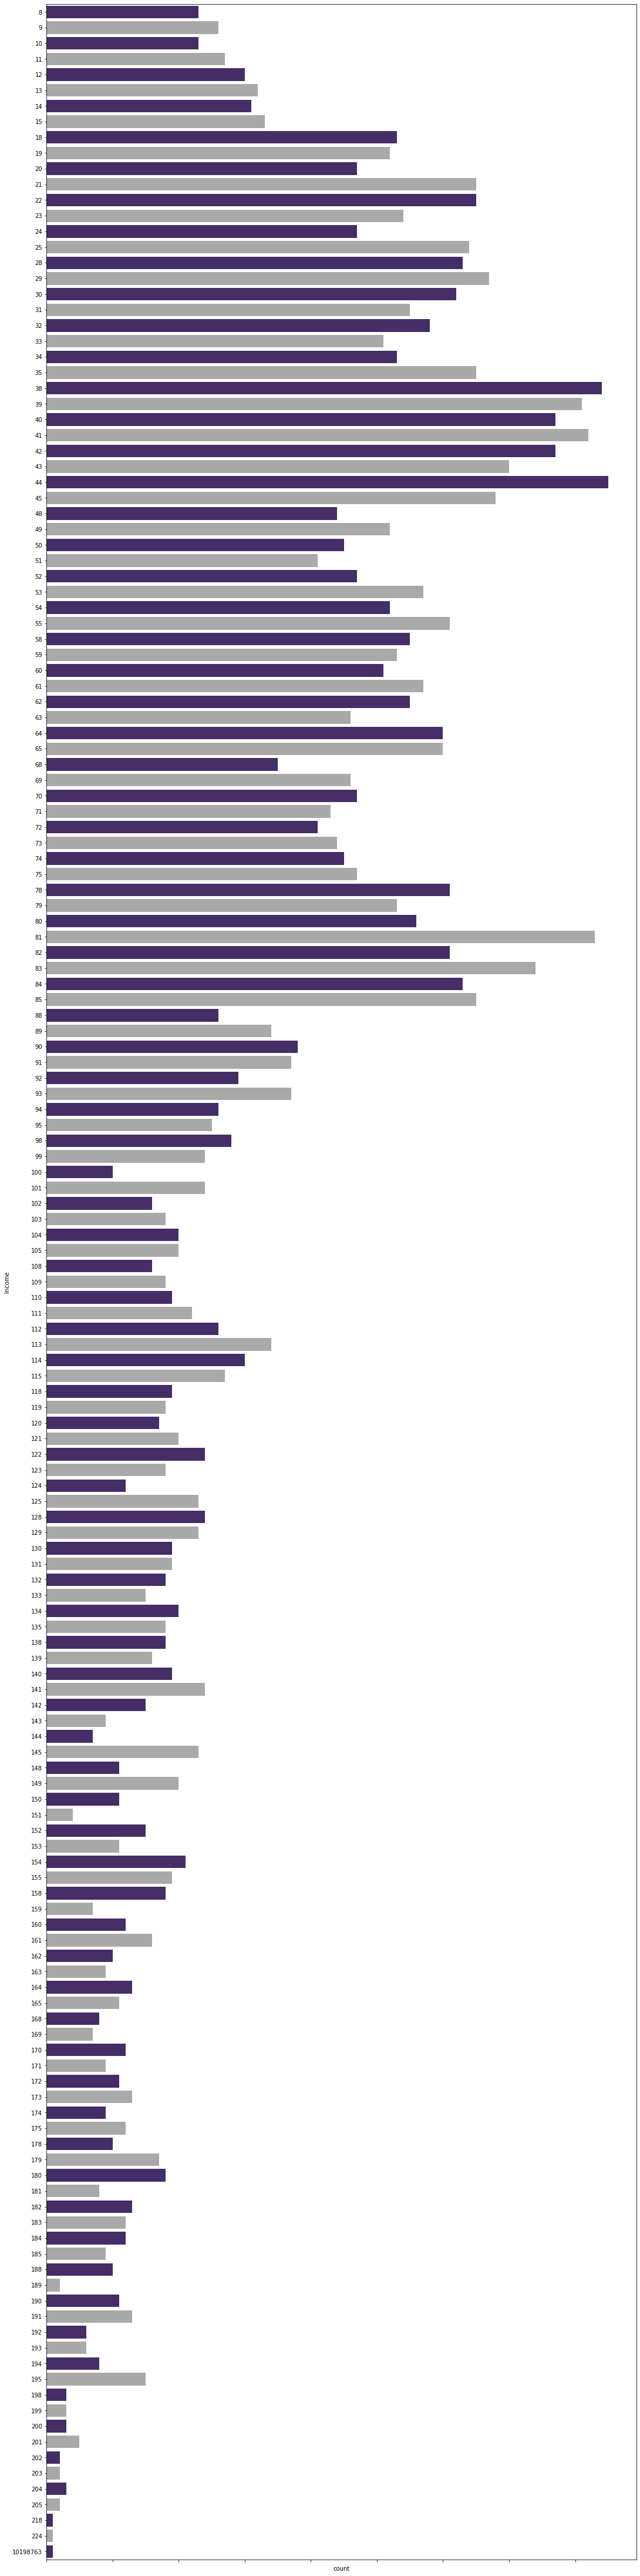

In [203]:
#Univariate plot to look at the income
plt.figure(figsize=(18,80));
chart = sns.countplot(y="Income",data=loan_data, palette=['#432371',"#A9A9A9"]);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


#analysis - the income of the sample data seems to be more focused in the 15k-90k with std being around 46k as 
#outlined in the description data and highly skewed.

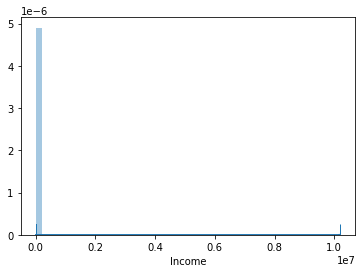

In [204]:
#use this to get a high level view of the data line as compared to the count plot above.
sns.distplot(loan_data['Income'],kde=True, rug=True);

#### Want to look at highest income values in df to see how skewed data is
loan_data.sort_values(by=['Income']).tail(25)

In [206]:
#i want to drop row 2747 as it has skewed imcome
loan_data = loan_data.drop(index=2747)
loan_data.sort_values(by=['Income']).tail(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
3124,3125,45,20.0,198,95053,2,2.80,undergrad,0,0,0,0,1,1
2319,2320,34,9.0,198,95819,2,3.00,undergrad,422,0,0,0,1,0
1704,1705,46,22.0,198,95521,2,6.67,undergrad,0,0,0,0,0,1
4606,4607,44,20.0,199,94607,2,6.67,undergrad,0,0,0,0,1,0
3758,3759,47,23.0,199,94720,2,6.67,undergrad,0,0,0,0,1,0
4659,4660,28,4.0,199,92121,1,6.33,undergrad,0,0,0,0,0,0
917,918,45,20.0,200,90405,2,8.80,undergrad,0,0,0,0,1,1
459,460,35,10.0,200,91107,2,3.00,undergrad,458,0,0,0,0,0
1716,1717,32,8.0,200,91330,2,6.50,undergrad,565,0,0,0,1,0
1901,1902,43,19.0,201,94305,2,6.67,undergrad,0,0,1,0,1,0


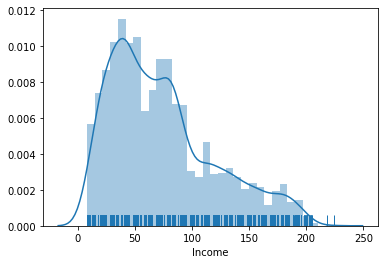

In [207]:
#use this to get a high level view of the data 
sns.distplot(loan_data['Income'],kde=True, rug=True);

<h3>Zip Code</h3>

In [225]:
#Zip Code normalized value counts for analysis. 
loan_data['ZIP Code'].value_counts()

#Analysis: There are a fair amount of zip codes with no major focus on just one area or zipcode. The assortment of zip codes
#are also pretty balanced over the spectrum of them. My initial thought
#is that this is not valuable and will benefit the model if removed. If we were focusing on a different result such
#as marketing for the personal loan in a specific area, this initial opinion may be different. 

94720    169
94305    127
95616    116
90095     71
93106     57
93943     54
92037     54
91320     53
91711     52
94025     52
92093     51
90245     50
90024     50
90089     46
91330     46
94304     45
92121     45
94143     36
95051     34
94608     34
92521     32
92182     32
92028     32
95054     31
95814     30
95014     29
94542     27
94301     27
94550     27
95064     26
95819     26
93407     26
95039     26
94501     26
91107     25
94303     25
95060     25
94022     25
94105     25
93117     24
94596     24
94080     23
95521     23
93555     23
91380     22
92717     22
92612     22
94110     21
91768     21
92647     21
90401     20
94117     20
94132     20
90034     20
95747     19
92697     19
90266     19
94005     19
90025     19
92122     19
94309     18
94122     18
90291     18
90840     18
94709     18
93940     18
92130     18
92691     17
92096     17
92407     17
94583     17
90740     17
93023     17
91311     17
92009     17
92120     17
90630     17

<h3>Family</h3>

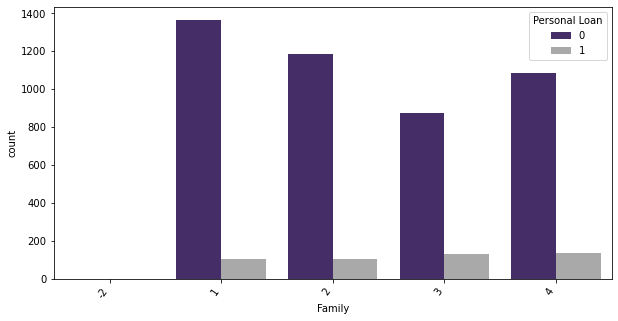

In [209]:
#Univariate plot to look at the family
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['Family'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

#analysis - the family is from 1-4 and seems to be pretty even sample size. The sample size has a little 
#more on the 1-2 side as pointed out by the 2.39 mean in the description

In [224]:
loan_data.sort_values(by=['Family']).head(25)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1061,1062,47,22.0,33,91105,1,1.40,advanced/professional,0,0,0,0,1,0
4659,4660,28,4.0,199,92121,1,6.33,undergrad,0,0,0,0,0,0
4660,4661,59,35.0,38,92122,1,0.80,undergrad,0,0,0,0,1,0
4661,4662,43,19.0,129,95039,1,5.00,undergrad,0,0,1,0,1,0
1288,1289,63,38.0,129,91326,1,0.90,undergrad,366,0,0,0,1,0
2829,2830,35,9.0,82,94720,1,2.50,undergrad,138,0,0,0,0,0
4663,4664,28,3.0,115,92407,1,1.90,undergrad,200,0,0,0,1,0
1284,1285,65,40.0,128,90740,1,2.50,undergrad,162,0,0,0,1,0
1282,1283,51,26.0,55,93955,1,1.30,graduate,236,0,0,0,0,1
4291,4292,46,21.0,34,90034,1,0.10,undergrad,124,0,0,0,1,0


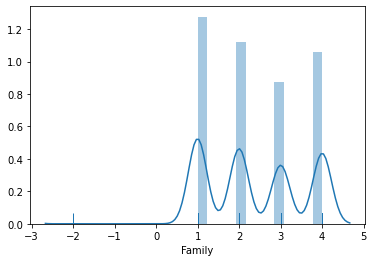

In [219]:
#use this to get a high level view of the mortgage values
sns.distplot(loan_data['Family'],kde=True, rug=True);

In [220]:
#Search for family with int < 1
loan_data.loc[loan_data['Family'] < 1] 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1018,1019,39,15.0,61,90018,-2,0.6,advanced/professional,127,0,0,0,0,0


In [222]:
# Drop the index 1018 due to the invalid family count number
loan_data = loan_data.drop(index=1018)

In [223]:
# Verify that the row got dropped. 
loan_data.loc[loan_data['Family'] < 1] 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


<h3>Securities</h3>

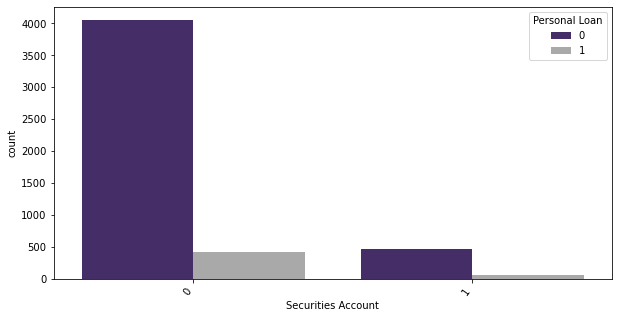

In [210]:
#Securities data 
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['Securities Account'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

<h3>CD Account</h3>

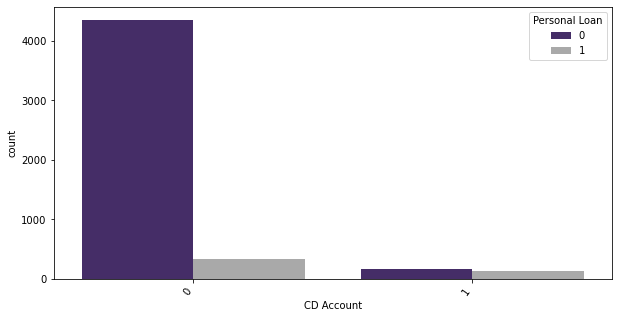

In [211]:
#Cd Account data goes here
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['CD Account'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

<h3>Online</h3>

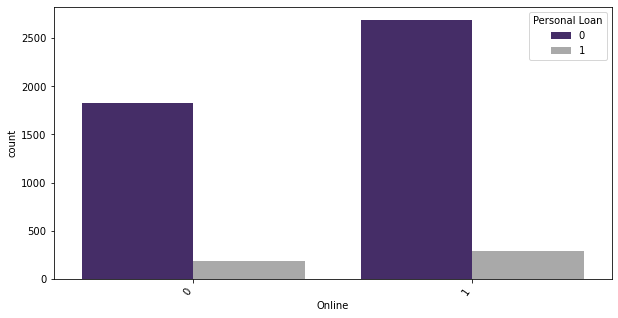

In [212]:
#Online account data goes here
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['Online'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);

<h3>Credit Card</h3>

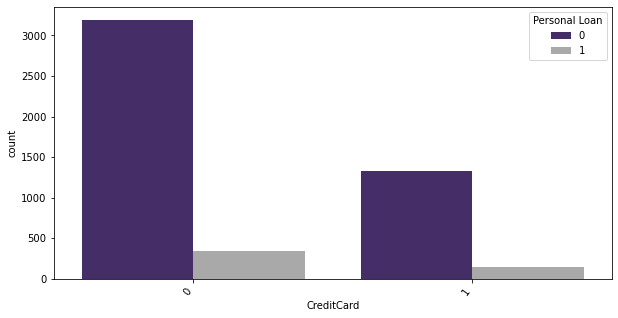

In [213]:
#Credit card data 
plt.figure(figsize=(10,5));
chart = sns.countplot(loan_data['CreditCard'], palette=['#432371',"#A9A9A9"],hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


#### Use pairplot to look high level at the data in the dataset.
sns.pairplot(loan_data)

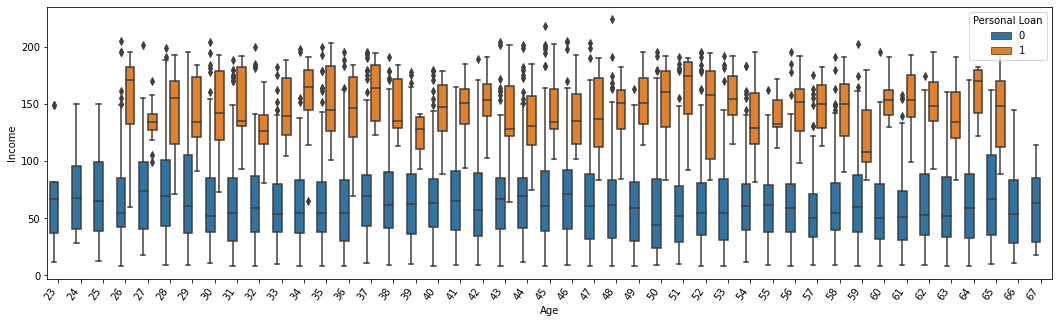

In [215]:
#boxplot to look at age and income compared to who accepted the personal loan
plt.figure(figsize=(18,5));
chart = sns.boxplot(loan_data['Age'], loan_data['Income'], hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


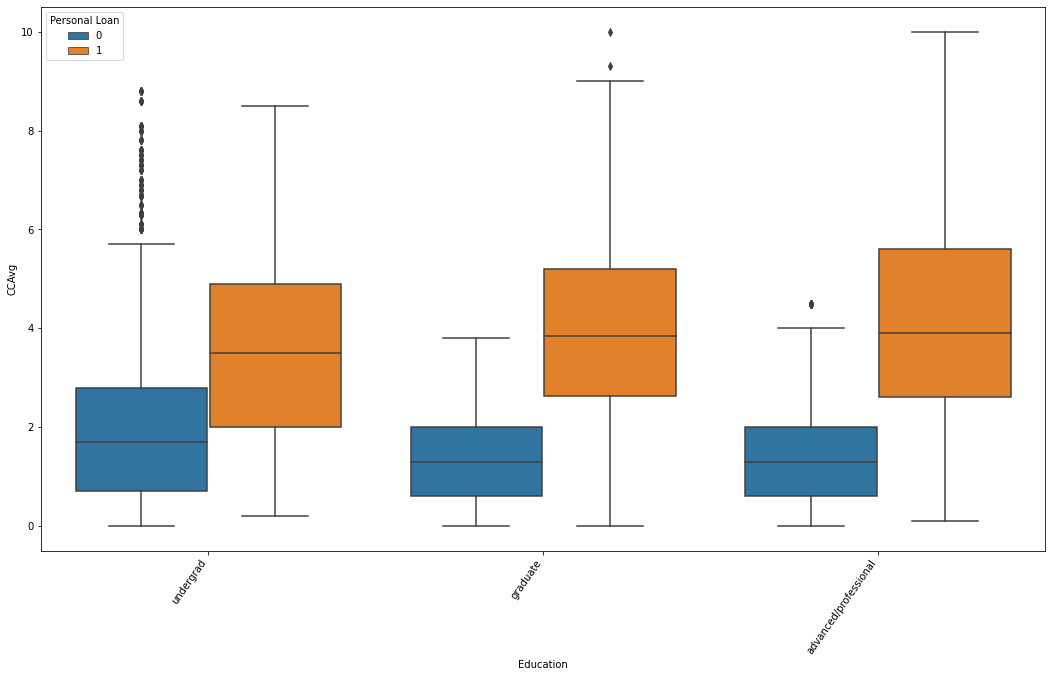

In [216]:
plt.figure(figsize=(18,10));
chart = sns.boxplot(loan_data['Education'], loan_data['CCAvg'], hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


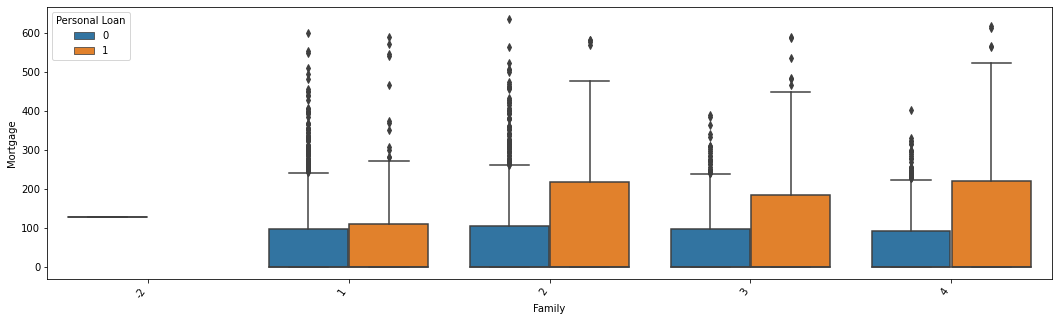

In [217]:
plt.figure(figsize=(18,5));
chart = sns.boxplot(loan_data['Family'], loan_data['Mortgage'], hue=loan_data['Personal Loan']);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);


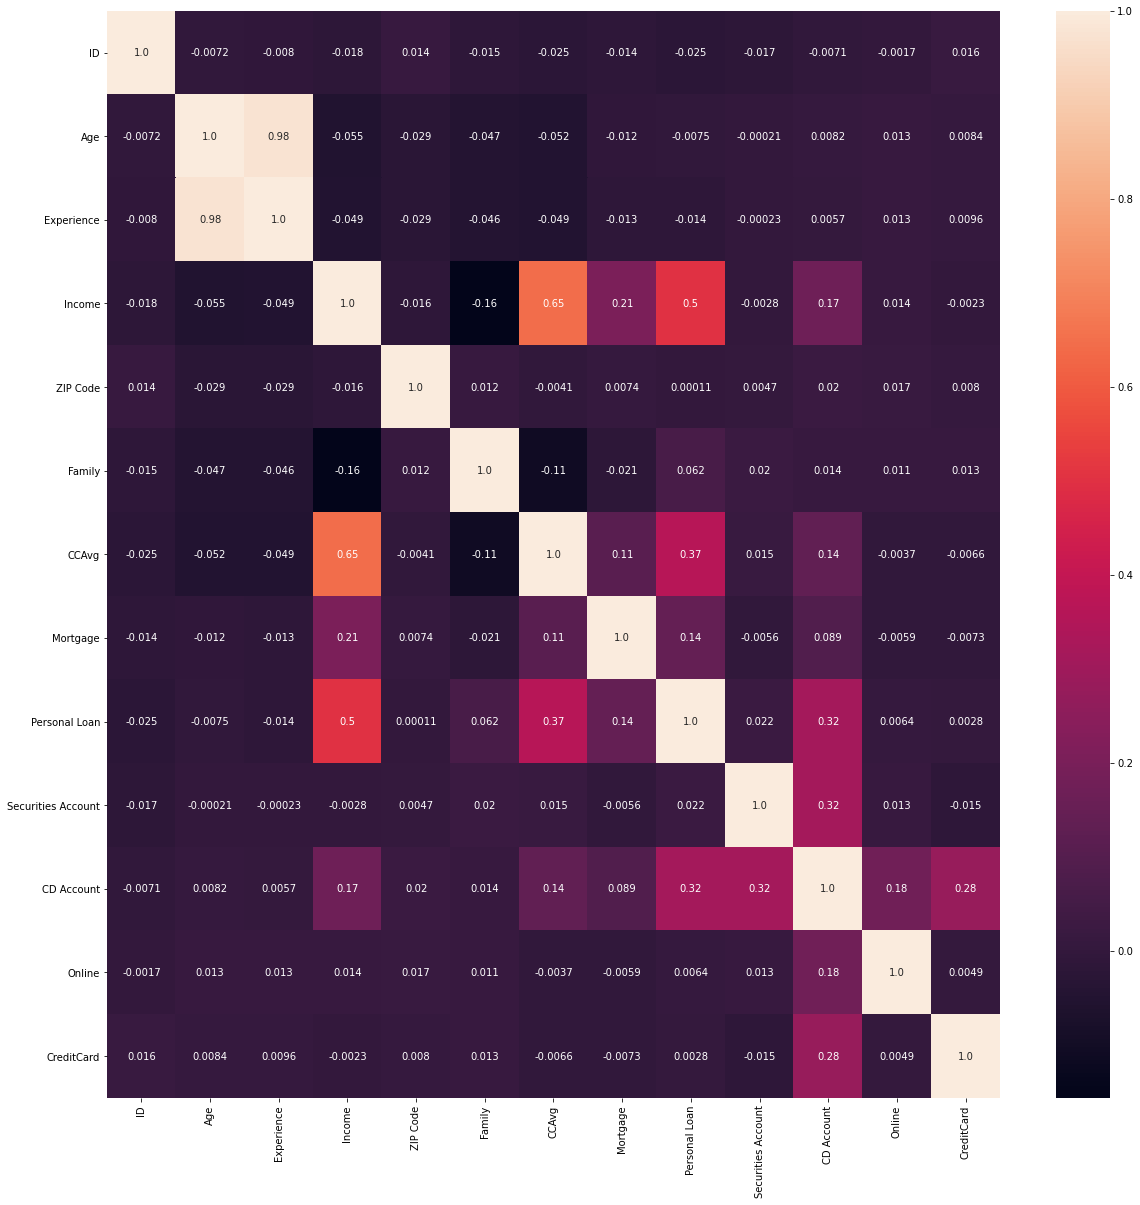

In [218]:
#Heatmap to evaluate the data
plt.figure(figsize=(20,20))
sns.heatmap(loan_data.corr(),annot=True,fmt=".2",)
plt.show()

#Analysis: There seems to be the similar correlations as I expected by going through the EDA up to this point. 
#there is a correlation between personal loan, credit card avg, mortgage and income.